In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py


initialize centoids
1 . randomly selecting from min to max
2 . select data points from dataset N-clusters
    2.1  top N cluster
    2.2  bottom N cluster
    2.3  Random N selection from dataset


In [ ]:
df1 = pd.read_excel("/content/kmean.xlsx",sheet_name="kmeans_data",header=None)
df1


,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [ ]:
import random
init_centroid = random.sample(range(0,len(df1)),3)
init_centroid

[178, 256, 239]

In [ ]:
centroids=[]
for i in init_centroid:
  centroids.append(df1.iloc[i])

In [ ]:
centroids

[0    1.605200
 1    1.109805
 Name: 178, dtype: float64,
 0    5.578123
 1    3.247660
 Name: 256, dtype: float64,
 0    3.961625
 1    2.720250
 Name: 239, dtype: float64]

In [ ]:
centroids = np.array(centroids)
centroids

array([[1.60519991, 1.1098053 ],
       [5.57812294, 3.24766016],
       [3.96162465, 2.72025046]])

In [ ]:
X=np.array(df1)

In [ ]:
def calc_distance(i,j):
  return (sum((i-j)**2)**0.5)

In [ ]:
def findnearcentroid(centroid,X):
  assignedcluster = []
  for i in X:
    dist=[]
    for j in centroid:
      dist.append(calc_distance(i,j))
    assignedcluster.append(np.argmin(dist))
  return assignedcluster



In [ ]:
get_centroid = findnearcentroid(centroids,X)
get_centroid

[2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
def calculating_centroid(cluster_number,X):
  new_centroid = []
  new_df = pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)
  for c in set(new_df['cluster']):
    current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    cluster_mean = current_cluster.mean(axis=0)
    new_centroid.append(cluster_mean)
  return new_centroid


In [ ]:
# pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)

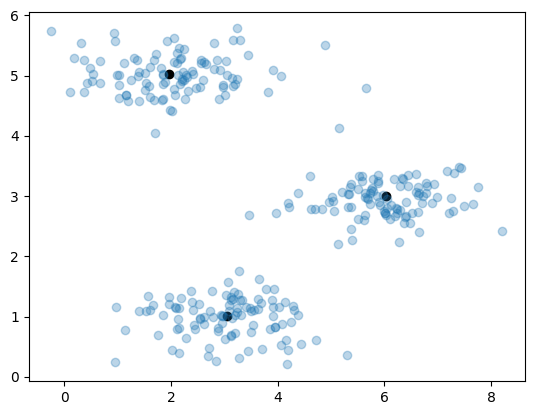

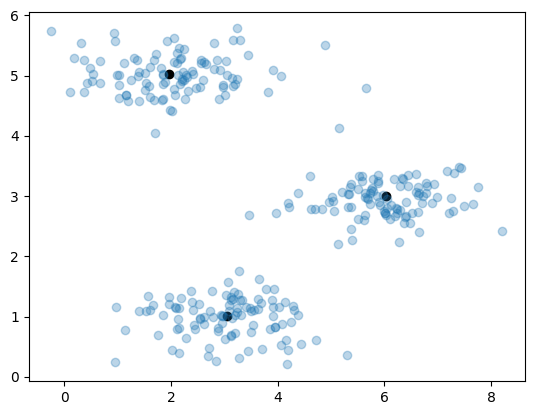

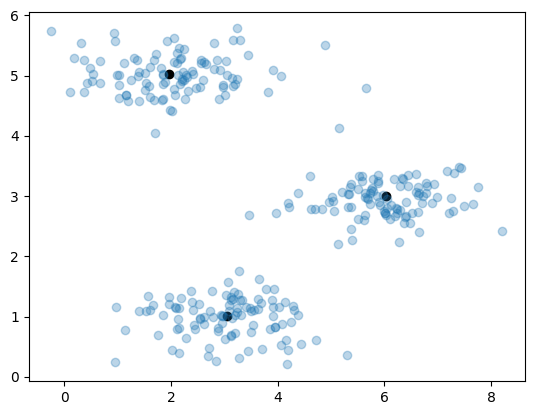

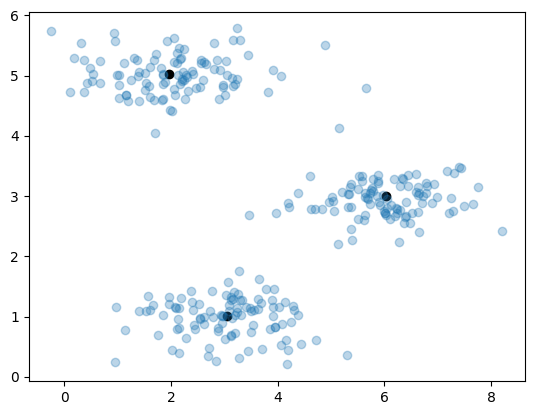

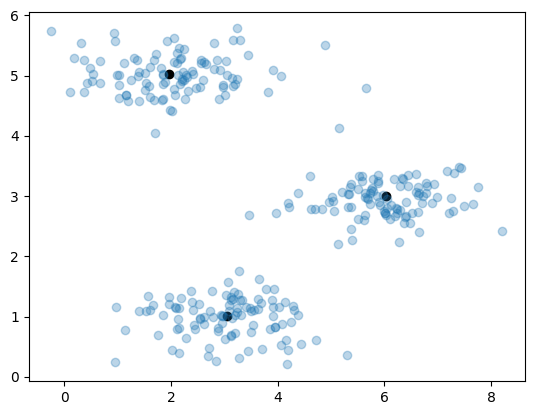

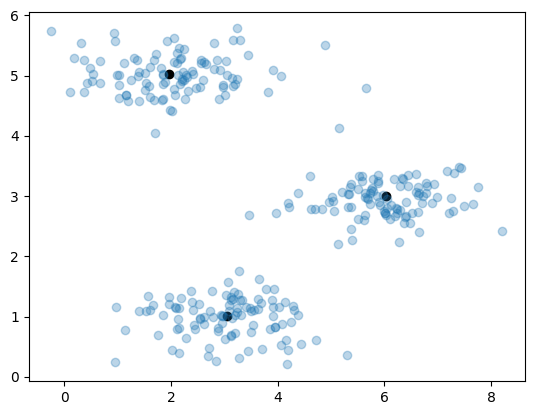

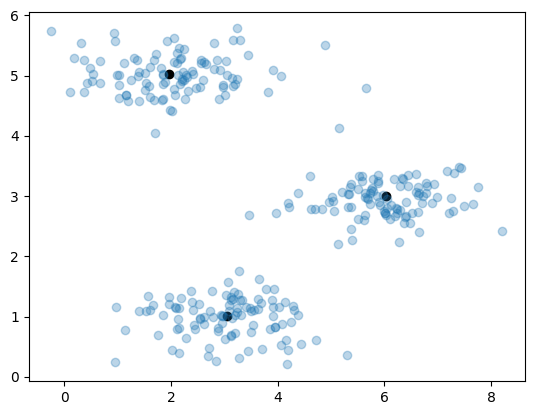

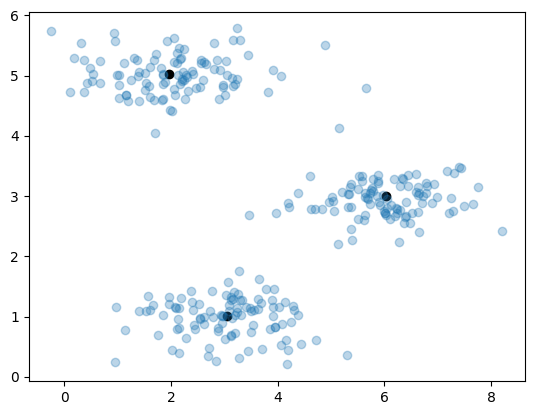

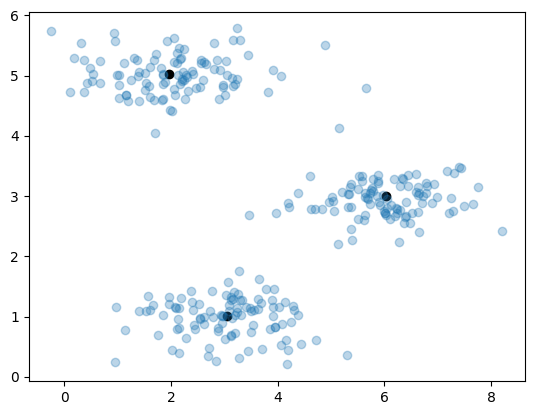

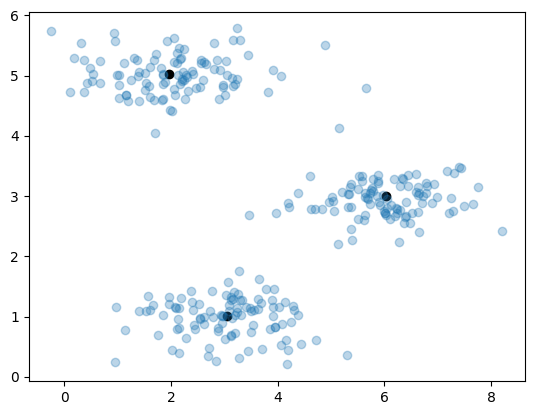

In [ ]:
apoches = 10
for i in range(apoches):
  get_centroid = findnearcentroid(centroids,X)
  centroids = calculating_centroid(get_centroid,X)
  py.figure()
  py.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', label='Centroids')  # Plot centroids
  py.scatter(X[:,0],X[:,1],alpha=0.3) #plotting observatoin points

